<a href="https://colab.research.google.com/github/Eistam/CIND820-Project/blob/main/CIND820_bank_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [40]:
# import numpy for linear algebra and array list
import numpy as np 
# used to read csv files and create dataframes
import pandas as pd 
# to scale graphs and surpress errors in plotting 
%matplotlib inline 
# plotting library, for simple plots
import matplotlib.pyplot as plt 
 # plotting utility
import seaborn as sns
sns.set() # enabling plotting utility 
# Splitting the data into train-test values
from sklearn.model_selection import train_test_split
# standard scalar for normalizing the datasets 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# importing XGBClassifier 
from xgboost import XGBClassifier
#import naive_bayes 
from sklearn.naive_bayes import GaussianNB
# importing Logistic Regression from sklearn models 
from sklearn.linear_model import LogisticRegression
#importing Random Forest Classifier from sklearn.ensemble 
from sklearn.ensemble import RandomForestClassifier
# importing metrics for evaluation of the model 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 
# import KFold for the cross validation 
from sklearn.model_selection import cross_val_score, KFold
# importing warnings 
import warnings as wr
wr.filterwarnings("ignore")
#import dataset
df = pd.read_csv("/content/bank-additional-full.csv", sep=';')
# Detailed information of the dataframe
df.info()
#display top 1000 rows
df.head(1000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,32,entrepreneur,married,basic.6y,no,yes,no,telephone,may,wed,163,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
996,41,services,single,high.school,no,yes,yes,telephone,may,wed,345,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
997,59,housemaid,married,basic.6y,no,yes,no,telephone,may,wed,329,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
998,57,technician,married,basic.9y,no,yes,no,telephone,may,wed,68,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no


# EDA - Exploratory Data Analysis

In [41]:
# Detailed information of the dataframe
df.info()
#display top 1000 rows
df.head(1000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,32,entrepreneur,married,basic.6y,no,yes,no,telephone,may,wed,163,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
996,41,services,single,high.school,no,yes,yes,telephone,may,wed,345,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
997,59,housemaid,married,basic.6y,no,yes,no,telephone,may,wed,329,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
998,57,technician,married,basic.9y,no,yes,no,telephone,may,wed,68,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no


In [42]:
#viewing columns of the data set 
cols = list(df.columns)
for col in cols:
    for i in range(df.shape[0]):
        if col == "job" and df[col][i] == "unknown":
            df[col][i] = "unemployed"  #Assuming unemployed status
        if col == "marital" and df[col][i] == "unknown":
            df[col][i] = "single" #Assuming 'Single' status
        if col == "education" and df[col][i] == "unknown":
            df[col][i] = "illiterate" #Assuming uneducated status    
        if col in ["default", "housing", "loan"] and df[col][i] == "unknown":
            df[col][i] = None
        # Similarly, pdays = 999 indicates the client was not contacted and deemed not interested so can be dropped.
        if col == "pdays" and df[col][i] == 999:
            df[col][i] = None
        # poutcome can either be success or failure. Thus, nonexistant =  missing data and, can be dropped.
        if col == "poutcome" and df[col][i] == "nonexistent":
            df[col][i] = None


In [43]:
df.isna().sum()

age                   0
job                   0
marital               0
education             0
default            8597
housing             990
loan                990
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays             39673
previous              0
poutcome          35563
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

#Check Distribution of Target Variable (y)

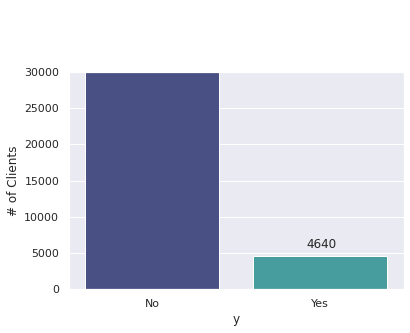

In [45]:
#Check distribution of target variable (y)
plt.figure(figsize=(6,4))

ax = sns.countplot(x="y", data=df, palette="mako")

plt.xlabel("y", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,30000)
plt.xticks([0,1], ['No', 'Yes'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+1000))
    
plt.show()

Data set target outcome is unbalanced

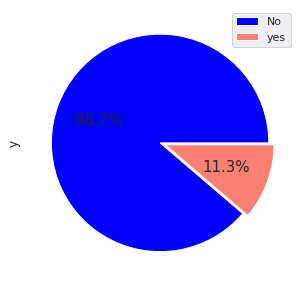

In [46]:
#Check distribution of target variable (y)
plt.figure(figsize=(7,5))

df['y'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['blue','salmon'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['No', 'yes'])
plt.show()

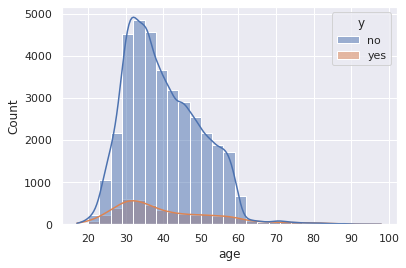

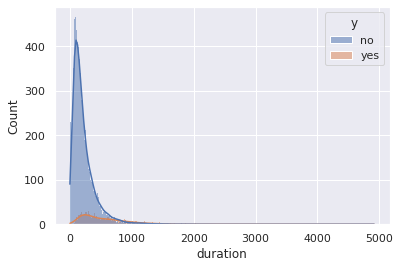

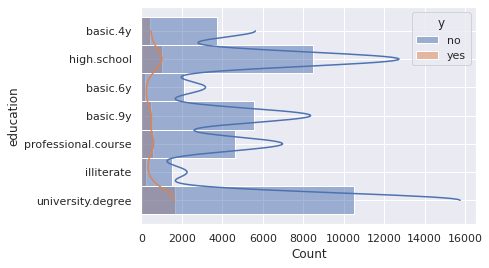

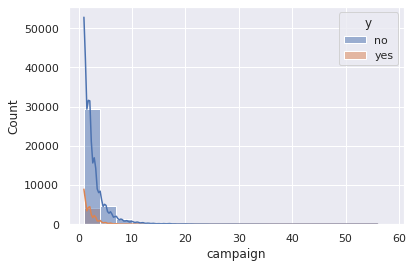

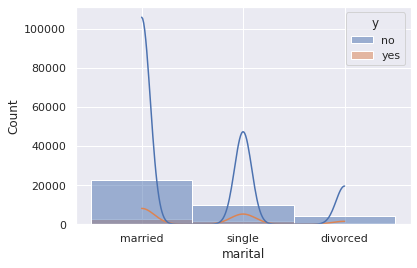

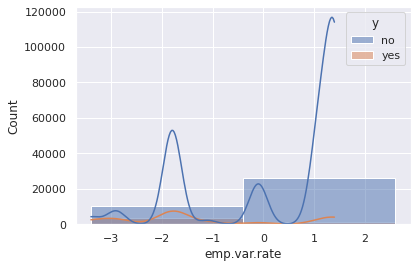

In [47]:
#explore other data variables with histplot
# show histplot for age
sns.histplot(data=df, x="age", binwidth=3, hue="y", kde=True)
plt.show()
# show histplot for duration
sns.histplot(data=df, x="duration", binwidth=3, kde=True, hue="y")
plt.show()
# show histplot for education
sns.histplot(data=df, y="education", binwidth=3, kde=True, hue="y")
plt.show()
# show histplot for campain
sns.histplot(data=df, x="campaign", binwidth=3, kde=True, hue="y")
plt.show()
# show histplot for marital status
sns.histplot(data=df, x="marital", binwidth=3, kde=True, hue="y")
plt.show()
# show histplot for emp.var.rate
sns.histplot(data=df, x="emp.var.rate", binwidth=3, kde=True, hue="y")
plt.show()

# Feature Selection

In [48]:
# pdays, previous and poutcome columns can be dropped since most of the clients seem to be new.
df.drop(['pdays', 'poutcome', 'previous'], axis=1, inplace=True)
# Drop the records with missing data
df.dropna(axis=0, how='any', inplace=True)

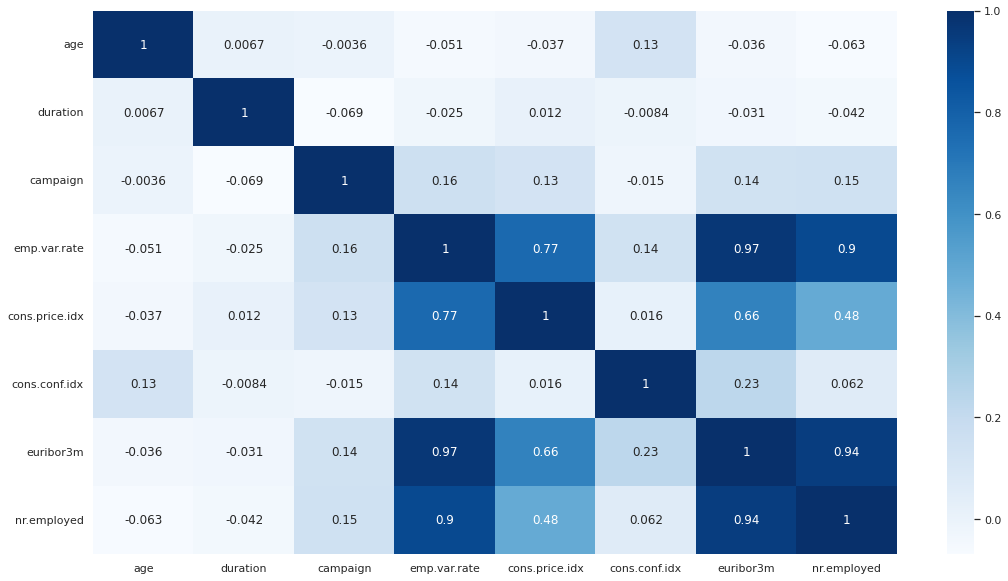

In [49]:
# Lets check for correlated data
correlated_data = df.corr()
# plot the correlation graph
plt.figure(figsize= (18,10))
#visualize and annotae the correlated data
sns.heatmap(correlated_data, cmap="Blues", annot=True)
# to show the graph
plt.show()


# Data Pre-processing

In [50]:

# duration also can be dropped for the purpose of predictive analysis.
df.drop(['emp.var.rate', 'euribor3m', 'nr.employed', 'duration'], axis=1, inplace=True)
# Converting categorical and binary type columns to numerical type for easy computation. 
binary_cols = ['default', 'housing', 'loan', 'y']
dummy_list = [] # initialize the empty list for dummies 
for c in binary_cols: #iterate while creating new values 
    for text in df[c].values:
        if text == 'yes':
            dummy_list.append(1)
        else:
            dummy_list.append(0)
    df[c] = dummy_list
    dummy_list = []

# generate new integer values for non integers 
job_types = {'admin.':1,'blue-collar':2,'entrepreneur':3,'housemaid':4,'management':5,'retired':6,'self-employed':7,
             'services':8,'student':9,'technician':10,'unemployed':11}
marital_status = {'divorced':1,'married':2,'single':3}
edu = {'basic.4y':1,'basic.6y':2,'basic.9y':3,'high.school':4,'illiterate':5,'professional.course':6,'university.degree':7}
contact_type = {'cellular':1,'telephone':2}
months = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
days = {'mon':1,'tue':2,'wed':3,'thu':4,'fri':5}

# copy dummy values back to the original dataset 
cpy = []
for txt in df['job'].values:
    cpy.append(job_types[txt])
df['job'] = cpy
cpy = []
for txt in df['marital'].values:
    cpy.append(marital_status[txt])
df['marital'] = cpy
cpy = []
for txt in df['education'].values:
    cpy.append(edu[txt])
df['education'] = cpy
cpy = []
for txt in df['contact'].values:
    cpy.append(contact_type[txt])
df['contact'] = cpy
cpy = []
for txt in df['month'].values:
    cpy.append(months[txt])
df['month'] = cpy
cpy = []
for txt in df['day_of_week'].values:
    cpy.append(days[txt])
df['day_of_week'] = cpy
cpy = []
#load data again
df
# y refers to the target variable, response where 0 - 1 means subscribed and 0 means not subscribed

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,cons.price.idx,cons.conf.idx,y
0,56,4,2,1,0,0,0,2,5,1,1,93.994,-36.4,0
2,37,8,2,4,0,1,0,2,5,1,1,93.994,-36.4,0
3,40,1,2,2,0,0,0,2,5,1,1,93.994,-36.4,0
4,56,8,2,4,0,0,1,2,5,1,1,93.994,-36.4,0
6,59,1,2,6,0,0,0,2,5,1,1,93.994,-36.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,2,6,0,1,0,1,11,5,1,94.767,-50.8,1
41184,46,2,2,6,0,0,0,1,11,5,1,94.767,-50.8,0
41185,56,6,2,7,0,1,0,1,11,5,2,94.767,-50.8,0
41186,44,10,2,6,0,0,0,1,11,5,1,94.767,-50.8,1


# Train-Test Split Unbalanced Dataset


 Displaying results for unbalanced dataset

 ========== Displaying results for Logistic Regression ========== 
Accuracy score with cross validation for Logistic Regression: 0.869698

 Accuracy score for Logistic Regression is : 87.40%


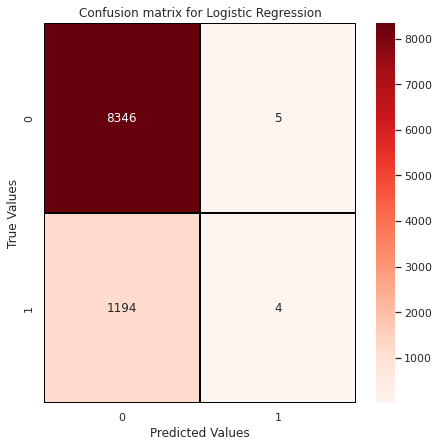

Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.874843     0.444444  0.874437     0.659644      0.820846
recall        0.999401     0.003339  0.874437     0.501370      0.874437
f1-score      0.932983     0.006628  0.874437     0.469806      0.816764
support    8351.000000  1198.000000  0.874437  9549.000000   9549.000000

 ========== Displaying results for Naive Bayes ========== 
Accuracy score with cross validation for Naive Bayes: 0.481034

 Accuracy score for Naive Bayes is : 43.30%


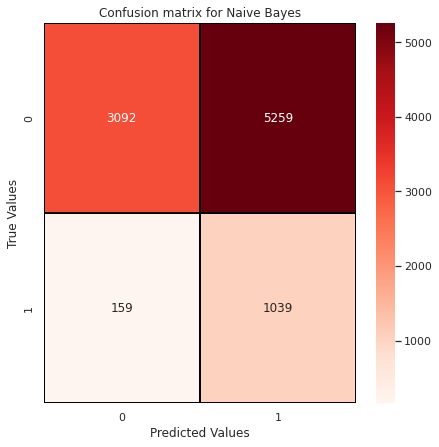

Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.951092     0.164973  0.432611     0.558032      0.852467
recall        0.370255     0.867279  0.432611     0.618767      0.432611
f1-score      0.533012     0.277215  0.432611     0.405113      0.500920
support    8351.000000  1198.000000  0.432611  9549.000000   9549.000000

 ========== Displaying results for Random Forest ========== 
Accuracy score with cross validation for Random Forest: 0.868082

 Accuracy score for Random Forest is : 87.40%


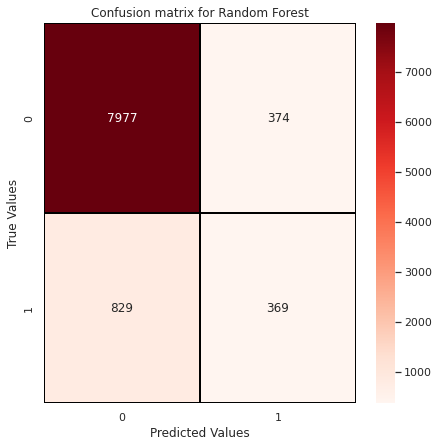

Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.905860     0.496635  0.874018     0.701247      0.854519
recall        0.955215     0.308013  0.874018     0.631614      0.874018
f1-score      0.929883     0.380216  0.874018     0.655050      0.860923
support    8351.000000  1198.000000  0.874018  9549.000000   9549.000000

 ========== Displaying results for XGBoost ========== 
Accuracy score with cross validation for XGBoost: 0.879348

 Accuracy score for XGBoost is : 88.10%


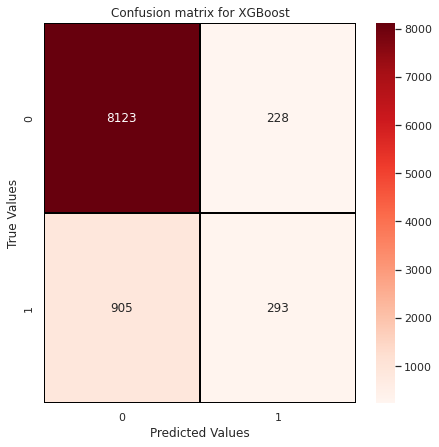

Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.899756     0.562380  0.881349     0.731068      0.857430
recall        0.972698     0.244574  0.881349     0.608636      0.881349
f1-score      0.934806     0.340896  0.881349     0.637851      0.860295
support    8351.000000  1198.000000  0.881349  9549.000000   9549.000000




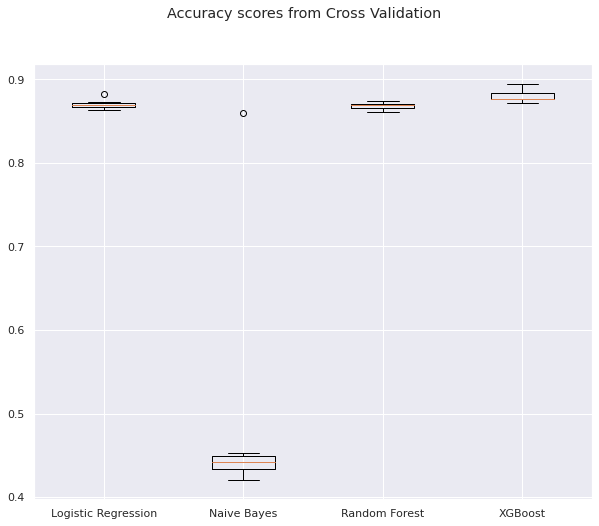

In [51]:
# split the data set with train_test_split function
target = df['y'] # where y is the target column 
feature_set = df.drop(['y'], axis=1) # gets other columns excluding the target column y 
# split the dataset 
X_train, X_test, Y_train, Y_test = train_test_split(feature_set,target, test_size=0.3, random_state=0)
#initialize classification algorithms 
classifiers = [('Logistic Regression', LogisticRegression()),
               ('Naive Bayes', GaussianNB()),
               ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=0, criterion='gini', bootstrap=True, oob_score=True)),
                ('XGBoost', XGBClassifier())
               ]

print(f"\n Displaying results for unbalanced dataset")
# initialize results and names for classifier 
results_c = []
names_c = []
# iterate through the classes while fitting the model, making predictions and evaluating each classification
for name, classifier in classifiers:
    score = 0
    # fit the model 
    classifier = classifier.fit(X_train, Y_train)
    # make predictions 
    predicted_target = classifier.predict(X_test)
    kfold = KFold(n_splits=10, random_state=None)
    # generate the cross validation accuracy scores 
    cv_results = cross_val_score(classifier, X_train, Y_train, cv=kfold, scoring='accuracy')
    # compute the  accuracy score in percentage and round to 2 decimal places
    score = accuracy_score(Y_test,predicted_target)
    print(f"\n ========== Displaying results for %s ========== "%name)
    results_c.append(cv_results)
    names_c.append(name)
    msg = "Accuracy score with cross validation for %s: %f" % (name, cv_results.mean())
    print(msg)
    print(f"\n Accuracy score for {name} is : {round(score, 3)* 100:.2f}%")
    #generate a confusion matrix 
    cm = confusion_matrix(Y_test, predicted_target)
    #  generate a classification report from the metricx 
    cl_report = pd.DataFrame(classification_report(Y_test, predicted_target, output_dict=True))
    fig, ax = plt.subplots(figsize=(7,7))
    # plot the confusion matrix graph using seaborn and matplotlib 
    sns.heatmap(cm, annot=True,linewidths=1.5,linecolor="#000000",fmt=".0f",ax=ax, cmap="Reds")
    plt.title("Confusion matrix for {}".format(name))
    plt.xlabel("Predicted Values")
    plt.ylabel("True Values")
    # display the graph 
    plt.show()
    # display the classification report 
    print(f"Classification Report:\n{cl_report}")

print(f'\n')
# plot the graph from the cross validation 
fig = plt.figure(figsize=(10,8))
fig.suptitle('Accuracy scores from Cross Validation')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.show()

Accuracy : LR = 87.40%, BN = 43.30%, RF = 87.40%, XGBoost = 88.10%

# Train-Test Split balanced Dataset

Counter({0: 27727, 1: 27727})

 Displaying results for balanced dataset  

 ========== Displaying results for Logistic Regression ========== 
Accuracy score with cross validation for Logistic Regression: 0.709148

 Accuracy score for Logistic Regression is : 70.90%


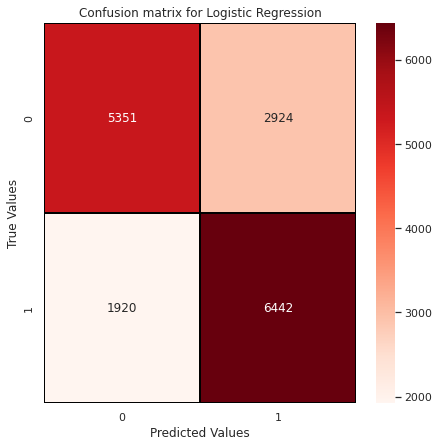

Classification Report:
                     0            1  accuracy     macro avg  weighted avg
precision     0.735937     0.687807  0.708842      0.711872      0.711746
recall        0.646647     0.770390  0.708842      0.708518      0.708842
f1-score      0.688409     0.726760  0.708842      0.707584      0.707685
support    8275.000000  8362.000000  0.708842  16637.000000  16637.000000

 ========== Displaying results for Naive Bayes ========== 
Accuracy score with cross validation for Naive Bayes: 0.659273

 Accuracy score for Naive Bayes is : 66.40%


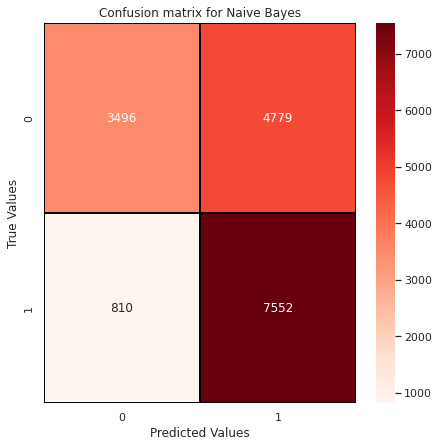

Classification Report:
                     0            1  accuracy     macro avg  weighted avg
precision     0.811890     0.612440  0.664062      0.712165      0.711644
recall        0.422477     0.903133  0.664062      0.662805      0.664062
f1-score      0.555759     0.729909  0.664062      0.642834      0.643289
support    8275.000000  8362.000000  0.664062  16637.000000  16637.000000

 ========== Displaying results for Random Forest ========== 
Accuracy score with cross validation for Random Forest: 0.889636

 Accuracy score for Random Forest is : 89.10%


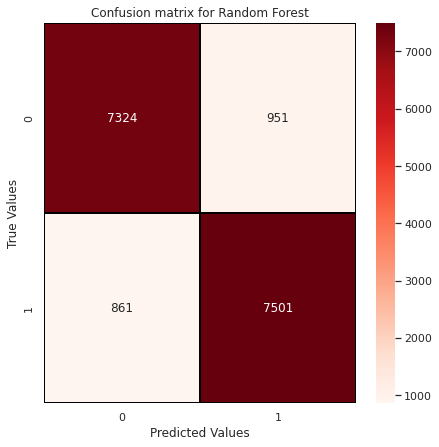

Classification Report:
                     0            1  accuracy     macro avg  weighted avg
precision     0.894808     0.887482  0.891086      0.891145      0.891126
recall        0.885076     0.897034  0.891086      0.891055      0.891086
f1-score      0.889915     0.892233  0.891086      0.891074      0.891080
support    8275.000000  8362.000000  0.891086  16637.000000  16637.000000

 ========== Displaying results for XGBoost ========== 
Accuracy score with cross validation for XGBoost: 0.809955

 Accuracy score for XGBoost is : 80.90%


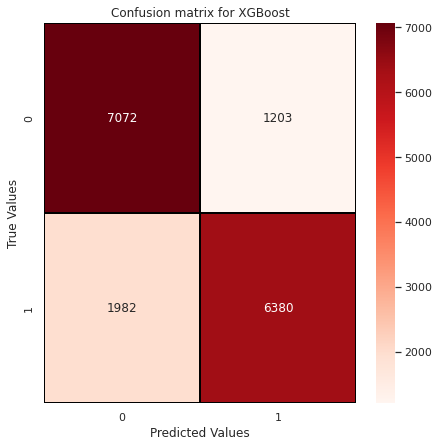

Classification Report:
                     0            1  accuracy     macro avg  weighted avg
precision     0.781091     0.841356  0.808559      0.811223      0.811381
recall        0.854622     0.762975  0.808559      0.808799      0.808559
f1-score      0.816204     0.800251  0.808559      0.808227      0.808186
support    8275.000000  8362.000000  0.808559  16637.000000  16637.000000




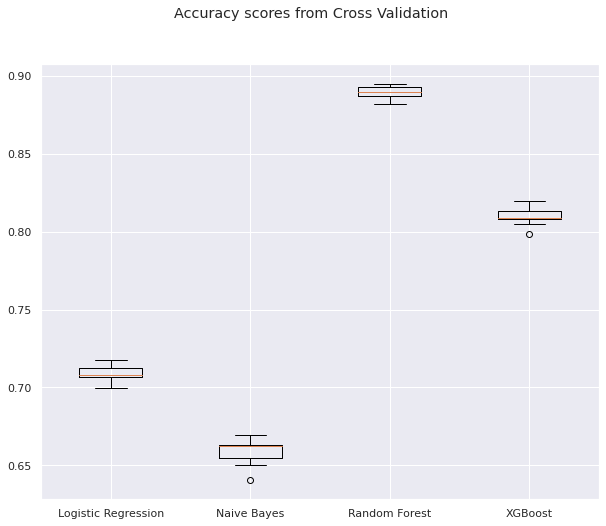

In [52]:
# balance the dataset and training again
# ***** ============== balancing of the dataset starts here ===== **** 
# import library Synthetic Minority Oversampling Technique(SMOTE) from imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
# fit predictor and target variable
target = df['y'] # where y is the target column 
feature_set = df.drop(['y'], axis=1) # get other columns excluding the target column y 
# initialize (SMOTE)
smote = SMOTE()
#fit and resample to balance the dataset
feature_set, target = smote.fit_resample(feature_set, target)
# count the 1's and 0's 
counter = Counter(target)
print(counter)
# ***** balancing of dataset ends here ********
# split the dataset 
X_train, X_test, Y_train, Y_test = train_test_split(feature_set,target, test_size=0.3, random_state=0)
#initialize classification algoritms 
models = [('Logistic Regression', LogisticRegression()),
          ('Naive Bayes', GaussianNB()),
          ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=0, criterion='gini', bootstrap=True, oob_score=True)),
          ('XGBoost', XGBClassifier())
          ]

print(f"\n Displaying results for balanced dataset  ")

# initialize results and names for classifier 
results_c = []
names_c = []
# iterate through the classes while fitting the model, making predictions and evaluating each classification
for name, classifier in models:
    score = 0
    # fit the model 
    classifier = classifier.fit(X_train, Y_train)
    # make predictions 
    predicted_target = classifier.predict(X_test)
    #initialize KFold for cross validation
    kfold = KFold(n_splits=10, random_state=None)
    # generate the cross validation accuracy scores 
    cv_results = cross_val_score(classifier, X_train, Y_train, cv=kfold, scoring='accuracy')
    # compute the  accuracy score in percentage and round to 2 decimal places
    score = accuracy_score(Y_test,predicted_target)
    print(f"\n ========== Displaying results for %s ========== "%name)
    results_c.append(cv_results)
    names_c.append(name)
    msg = "Accuracy score with cross validation for %s: %f" % (name, cv_results.mean())
    print(msg)
    print(f"\n Accuracy score for {name} is : {round(score, 3)* 100:.2f}%")
    #generate a confusion matrix 
    cm = confusion_matrix(Y_test, predicted_target)
    #  generate a classification report from the metricx 
    cl_report = pd.DataFrame(classification_report(Y_test, predicted_target, output_dict=True))
    fig, ax = plt.subplots(figsize=(7,7))
    # plot the confusion matrix graph using seaborn and matplotlib 
    sns.heatmap(cm, annot=True,linewidths=1.5,linecolor="#000000",fmt=".0f",ax=ax, cmap="Reds")
    plt.title("Confusion matrix for {}".format(name))
    plt.xlabel("Predicted Values")
    plt.ylabel("True Values")
    # display the graph 
    plt.show()
    # display the classification report 
    print(f"Classification Report:\n{cl_report}")

print(f'\n')
# plot the graph from the cross validation 
fig = plt.figure(figsize=(10,8))
fig.suptitle('Accuracy scores from Cross Validation')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.show()

In [53]:
#accuracy LR = 70.80%, NB = 67.10%, RF = 89.10%, XGBoost = 80.90%